In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset and make first column as row number
ad=pd.read_csv('Advertising.csv', index_col=0)

In [3]:
ad

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


Observation - The above data is for dollars(in thousands of dollars) spent on advertising in TV, Radio and Newspaper channel. 

Sales - The sales data shows sales of single project(in thousands of items) in market. 

In [4]:
# Checking null vales
ad.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

Observation - There is no null vales present in the given dataset.

In [5]:
# Checking data info
ad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


Observation - There are total 200 rows and 4 columns. There is no missing values and all the data in float64 data type. 

In [6]:
ad.shape

(200, 4)

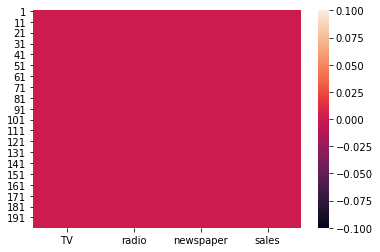

In [7]:
# Checking null values using heatmap
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(ad.isnull())

In [8]:
# Checking columns name
ad.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

# Summary Statistics

In [9]:
ad.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Observation - There is huge difference between 75% and maximum in column newspaper, So possibly outliers present. 

The minimum sales is 1.60 and maximum is 27.

Std is maximum in TV.

In [10]:
# Checking correlation 

ad_cor=ad.corr()
ad_cor

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


We can see correlation between two columns using above data.

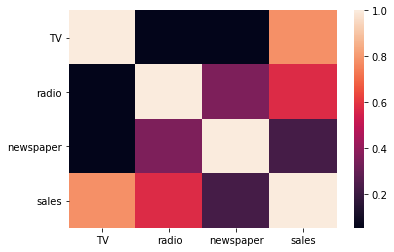

In [11]:
# Use heatmap to check correlation for better understanding.
sns.heatmap(data=ad_cor)

Observation - We can see there is little high correlation between tv and sales, and very low correlation between newspaper and sales. 

# Data Visualization

Univariate Analysis

In [12]:
#Checking total amount spent tv,radio and newspaper
print(ad['TV'].sum())
print(ad['radio'].sum())
print(ad['newspaper'].sum())

29408.5
4652.800000000001
6110.799999999999


Observation - We can see highest amount spent on TV.

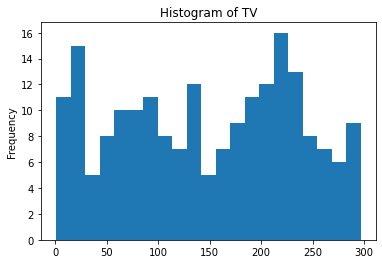

In [13]:
ad['TV'].plot.hist(bins=21)
plt.title('Histogram of TV')
plt.show()

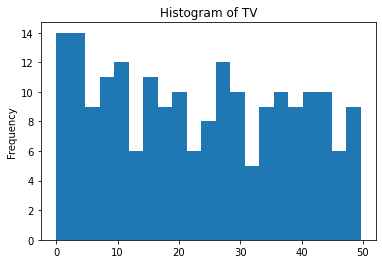

In [14]:
ad['radio'].plot.hist(bins=21)
plt.title('Histogram of TV')
plt.show()

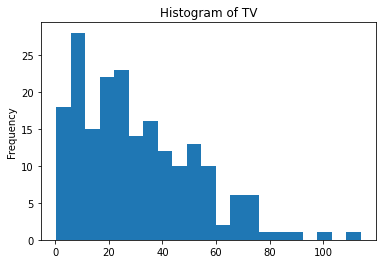

In [15]:
ad['newspaper'].plot.hist(bins=21)
plt.title('Histogram of TV')
plt.show()

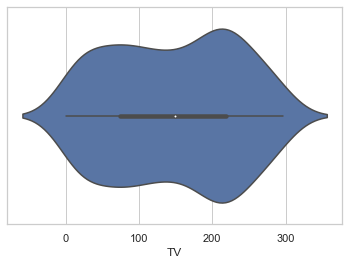

In [16]:
sns.set (style='whitegrid')
sns.violinplot(ad['TV'])
plt.show()

Observation - We can see avarage 180 to 240 ((in thousands of dollars)) spent on advertising for most products.  

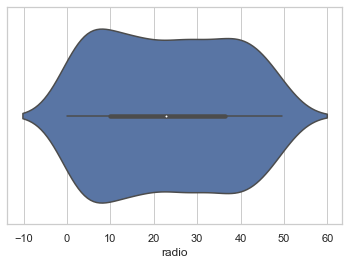

In [17]:
sns.set (style='whitegrid')
sns.violinplot(ad['radio'])
plt.show()

Observation - We can see avarage 5 to 20 ((in thousands of dollars)) spent on advertising for most products.

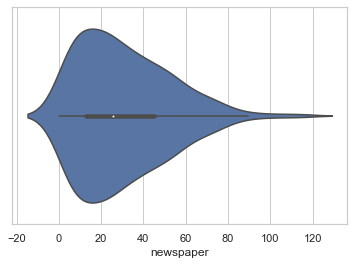

In [18]:
sns.set (style='whitegrid')
sns.violinplot(ad['newspaper'])
plt.show()

Observation - We can see avarage 10 to 30 ((in thousands of dollars)) spent on advertising for most products.

# Bivariate Analysis

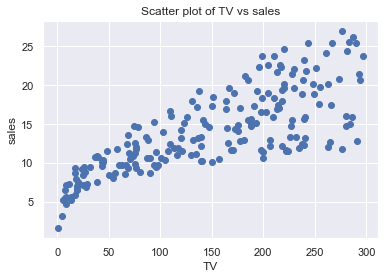

In [19]:
# Checking relationship between advertising channel and sale using scatter plot and pair plot
sns.set(style='darkgrid')
plt.scatter(ad['TV'],ad['sales'])
plt.xlabel('TV')
plt.ylabel('sales')
plt.title('Scatter plot of TV vs sales')
plt.show()

Observation - we can see there is positive relation between TV and sales, The graph shows more amount spent on tv the sales continuously increase.

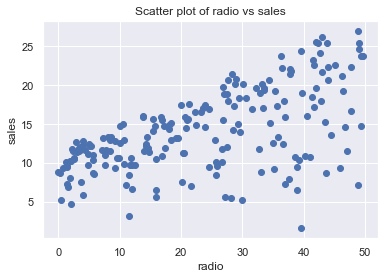

In [20]:
sns.set(style='darkgrid')
plt.scatter(ad['radio'],ad['sales'])
plt.xlabel('radio')
plt.ylabel('sales')
plt.title('Scatter plot of radio vs sales')
plt.show()

Observation - we can see there is low relation between radio and sales, The graph shows more amount spent on radio the sales not very much increase.

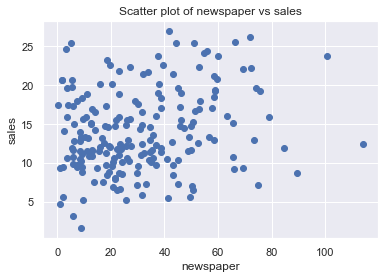

In [21]:
sns.set(style='darkgrid')
plt.scatter(ad['newspaper'],ad['sales'])
plt.xlabel('newspaper')
plt.ylabel('sales')
plt.title('Scatter plot of newspaper vs sales')
plt.show()

Observation - we can see there is very low relation between radio and sales, The graph shows more amount spent on radio, the sales not increase.

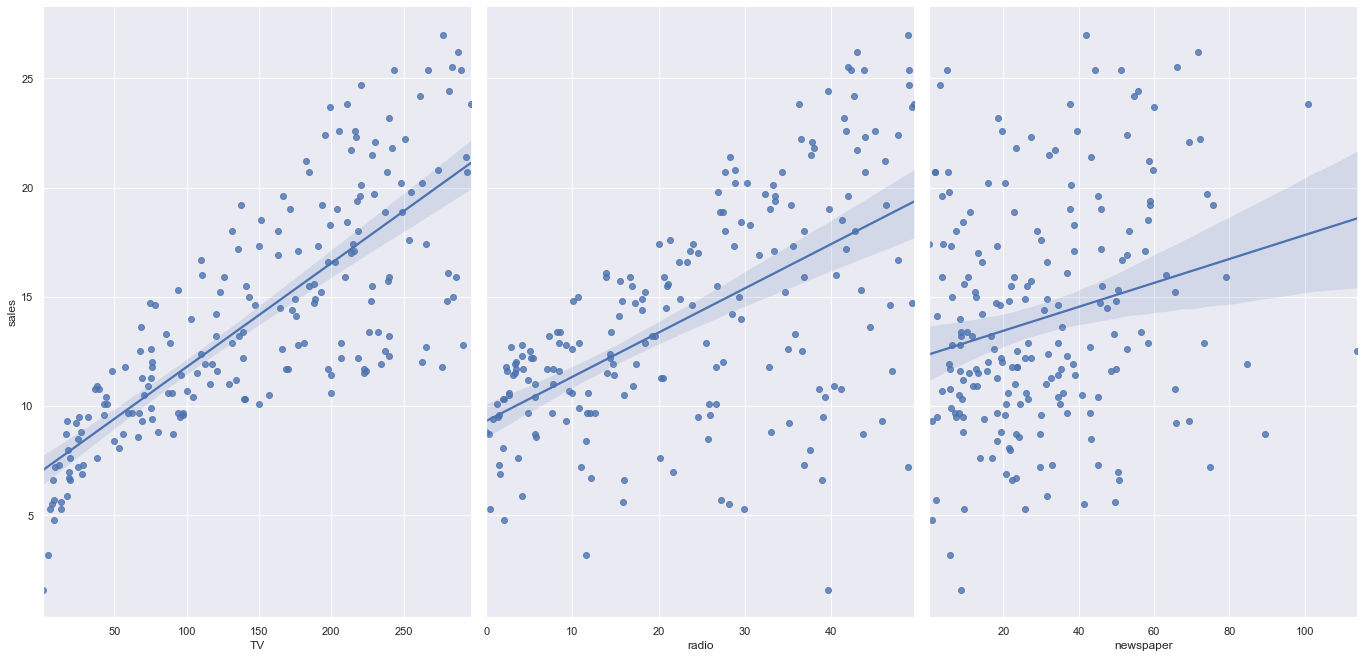

In [22]:
sns.pairplot(ad, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', size=9, aspect=0.7, kind='reg')

# Plotting Outliers

In [23]:
ad.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

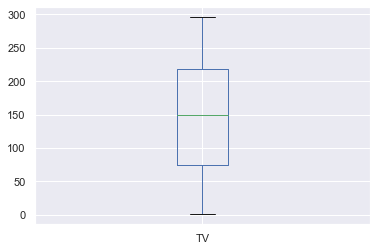

In [24]:
ad['TV'].plot.box()

Observation - no outliers present.

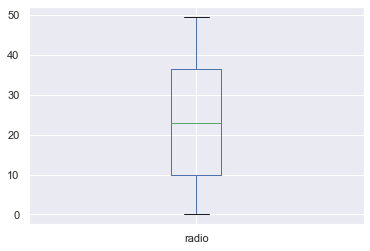

In [25]:
ad['radio'].plot.box()

Observation - No outliers present.

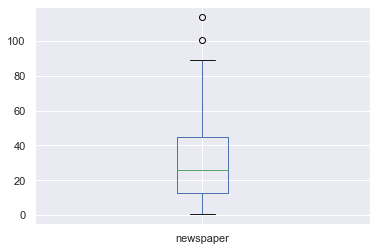

In [26]:
ad['newspaper'].plot.box()

Observation - Possibly outliers present in newspaper column.

# check the distribution of Skewnewss

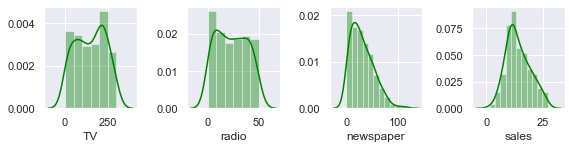

In [27]:
collist=ad.columns.values
ncol=10
nrow=5

plt.figure(figsize=(20,10))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.distplot(ad[collist[i]],color='green')
    plt.tight_layout()

In [28]:
#Checking skewnewss
ad.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

In [29]:
# Treating skewness via log method

for col in ad.columns:
    if ad[col].skew()>0.55:
        ad[col]=np.log1p(ad[col])

In [30]:
# Checking skewness again
ad.skew()

TV          -0.069853
radio        0.094175
newspaper   -0.799875
sales        0.407571
dtype: float64

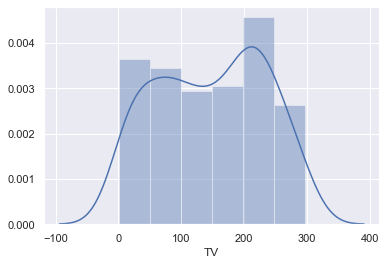

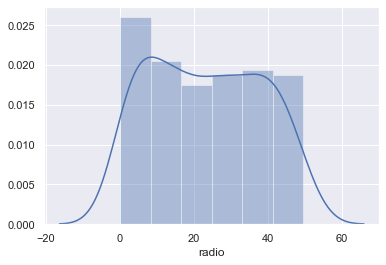

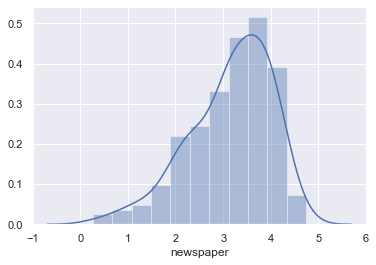

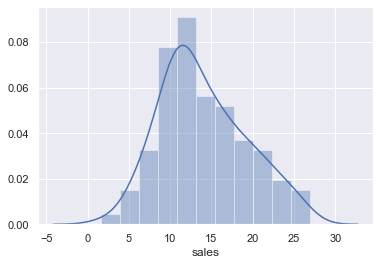

In [31]:
for i in ad.columns:
    sns.distplot(ad[i])
    plt.show()

Removing Outliers

In [32]:
from scipy.stats import zscore
z=np.abs(zscore(ad))
z

array([[9.69852266e-01, 9.81522472e-01, 1.27054817e+00, 1.55205313e+00],
       [1.19737623e+00, 1.08280781e+00, 7.84008452e-01, 6.96046111e-01],
       [1.51615499e+00, 1.52846331e+00, 1.27219508e+00, 9.07405869e-01],
       [5.20496822e-02, 1.21785493e+00, 1.07922051e+00, 8.60330287e-01],
       [3.94182198e-01, 8.41613655e-01, 1.07727442e+00, 2.15683025e-01],
       [1.61540845e+00, 1.73103399e+00, 1.36239293e+00, 1.31091086e+00],
       [1.04557682e+00, 6.43904671e-01, 5.26522686e-02, 4.27042783e-01],
       [3.13436589e-01, 2.47406325e-01, 7.16694174e-01, 1.58039455e-01],
       [1.61657614e+00, 1.42906863e+00, 2.84612391e+00, 1.77205942e+00],
       [6.16042873e-01, 1.39530685e+00, 6.14011337e-02, 6.57617064e-01],
       [9.45155670e-01, 1.17923146e+00, 8.52446540e-02, 1.04190753e+00],
       [7.90028350e-01, 4.96973404e-02, 1.78601844e+00, 6.48970529e-01],
       [1.43908760e+00, 7.99208859e-01, 1.21484164e+00, 9.26620392e-01],
       [5.78501712e-01, 1.05768905e+00, 1.21367806e

In [33]:
threshold=3
print(np.where(z>3))

(array([33], dtype=int64), array([2], dtype=int64))


In [34]:
ad_new=ad[(z<3).all(axis=1)]

In [35]:
print(ad.shape)

(200, 4)


In [36]:
print(ad_new.shape)

(199, 4)


Observation - Now we can see one row removed from dataset due to outliers.

# Model Training

In [37]:
# Separating data into input and output variables.

ad_x=ad_new.drop(columns=['sales'])

In [38]:
y=pd.DataFrame(ad_new['sales'])

In [39]:
y

,sales
1,22.1
2,10.4
3,9.3
4,18.5
5,12.9
...,...
196,7.6
197,9.7
198,12.8
199,25.5


In [40]:
# Scaling the input Variable

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(ad_x)
x=pd.DataFrame(x,columns=ad_x.columns)

In [41]:
# Checking skewness again
x.skew()

TV          -0.063150
radio        0.090691
newspaper   -0.717354
dtype: float64

In [42]:
# Make input and output variables into train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.20)

In [43]:
# Checking train and test data size
print(x_train.shape,'\t',x_test.shape)

(159, 3) 	 (40, 3)


In [44]:
print(y_train.shape,'\t',y_test.shape)

(159, 1) 	 (40, 1)


In [45]:
# Importing models library

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
# Importing error metrics

from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score

In [46]:
# Using algorithms via for loop

model=[LinearRegression(),Lasso(),Ridge(),ElasticNet(),SVR(),KNeighborsRegressor(),DecisionTreeRegressor()]
for p in model:
    p.fit(x_train,y_train)
    print('Score of', p , 'is:' , p.score(x_train,y_train))
    predp=p.predict(x_test)
    print('Error:')
    print('Mean absolute error:', mean_absolute_error(y_test,predp))
    print('Mean squared error:', mean_squared_error(y_test,predp))
    print('Root Mean squared error:', np.sqrt(mean_squared_error(y_test,predp)))
    print('r2_score:', r2_score(y_test,predp))
    print('********************************************************************************************')
    print('\n')

Score of LinearRegression() is: 0.9010296614813331
Error:
Mean absolute error: 1.3001880283843104
Mean squared error: 2.6739237734738177
Root Mean squared error: 1.6352136782310187
r2_score: 0.8677924272802668
********************************************************************************************


Score of Lasso() is: 0.8363905752495417
Error:
Mean absolute error: 1.2709268010153738
Mean squared error: 3.2386332892525234
Root Mean squared error: 1.7996203180817123
r2_score: 0.839871334273249
********************************************************************************************


Score of Ridge() is: 0.9009985274704772
Error:
Mean absolute error: 1.2960985001834047
Mean squared error: 2.6487267035434803
Root Mean squared error: 1.6274909227222991
r2_score: 0.8690382531666239
********************************************************************************************


Score of ElasticNet() is: 0.7512974271182399
Error:
Mean absolute error: 1.6848296841757453
Mean squared err

In [47]:
# Finding out best paramter using GridsearchCV
from sklearn.model_selection import GridSearchCV
dt=DecisionTreeRegressor()
parameters={'random_state':range(42,100)}
gc=GridSearchCV(dt,parameters)
gc.fit(x,y)
gc.best_params_


{'random_state': 54}

In [48]:
#Using DecisionTreeRegressor model with best results

dtc=DecisionTreeRegressor(criterion='mae',random_state=42)
dtc.fit(x_train,y_train)
print('Score:', dtc.score(x_train,y_train))
preddt=dtc.predict(x_test)
print('\n')
print('Mean absolute error:', mean_absolute_error(y_test,preddt))
print('Mean squared error:', mean_squared_error(y_test,preddt))
print('Root Mean squared error:', np.sqrt(mean_squared_error(y_test,preddt)))
print('\n')
print('r2_score:', r2_score(y_test,preddt))
    

Score: 1.0


Mean absolute error: 0.785
Mean squared error: 0.8775000000000002
Root Mean squared error: 0.9367496997597599


r2_score: 0.9566135182264941


In [49]:
# Cross validate of DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
score=cross_val_score(dtc,x,y,cv=5,scoring='r2')
print('Score:', score)
print('Mean Score:', score.std())
print('Standard Deviation:', score.std())

Score: [0.96933902 0.9401462  0.95588019 0.92876533 0.94266072]
Mean Score: 0.013968211815855962
Standard Deviation: 0.013968211815855962


# Using Ensemble Technique to boostup score

In [50]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=100,random_state=70)
rf.fit(x_train,y_train)
print('score:',rf.score(x_train,y_train))
predrf=rf.predict(x_test)
print('\n')
print('Mean absolute error:', mean_absolute_error(y_test,predrf))
print('Mean squared error:', mean_squared_error(y_test,predrf))
print('Root Mean squared error:', np.sqrt(mean_squared_error(y_test,predrf)))
print('\n')
print('r2_score:', r2_score(y_test,predrf))

score: 0.996880311597292


Mean absolute error: 0.5295250000000025
Mean squared error: 0.3916597250000022
Root Mean squared error: 0.6258272325490496


r2_score: 0.9806350569571181


In [51]:
from sklearn.ensemble import AdaBoostRegressor


ad=AdaBoostRegressor(base_estimator=dtc,n_estimators=20,learning_rate=1.0,random_state=70)
ad.fit(x_train,y_train)
print('score:',ad.score(x_train,y_train))
predad=ad.predict(x_test)
print('\n')
print('Mean absolute error:', mean_absolute_error(y_test,predad))
print('Mean squared error:', mean_squared_error(y_test,predad))
print('Root Mean squared error:', np.sqrt(mean_squared_error(y_test,predad)))
print('\n')
print('r2_score:', r2_score(y_test,predad))

score: 0.999660444677627


Mean absolute error: 0.5325
Mean squared error: 0.47225000000000017
Root Mean squared error: 0.6872044819411469


r2_score: 0.9766504090968227


RandomForestRegressor is working well because it gives the best r2 score. So i save RandomForestRegressor as my final Model.

In [52]:
# Cross validate of RandomForestRegressor
from sklearn.model_selection import cross_val_score
score=cross_val_score(rf,x,y,cv=5,scoring='r2')
print('Score:', score)
print('Mean Score:', score.std())
print('Standard Deviation:', score.std())

Score: [0.98237907 0.98435285 0.97368687 0.96192413 0.98045107]
Mean Score: 0.008151001174358026
Standard Deviation: 0.008151001174358026


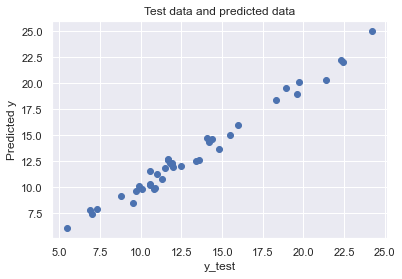

In [53]:
# Plotting scatter plot between test data and predicted data for RandomForestRegressor
plt.scatter(y_test,predrf)
plt.xlabel('y_test')
plt.ylabel('Predicted y')
plt.title('Test data and predicted data')
plt.show()

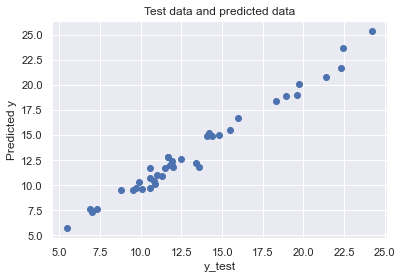

In [54]:
plt.scatter(y_test,predad)
plt.xlabel('y_test')
plt.ylabel('Predicted y')
plt.title('Test data and predicted data')
plt.show()

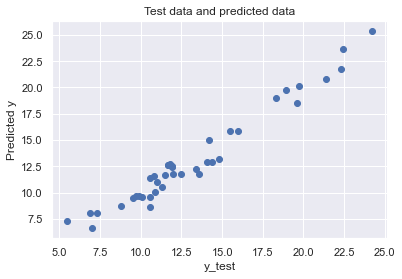

In [55]:
plt.scatter(y_test,preddt)
plt.xlabel('y_test')
plt.ylabel('Predicted y')
plt.title('Test data and predicted data')
plt.show()

In [56]:
# Saving the RandomForestRegressor\
import joblib
joblib.dump(rf,'Sales Channel Prediction.pkl')

['Sales Channel Prediction.pkl']